In [1]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [2]:
counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')

#Possar com a index la columna entre parentesi:
counts= counts.set_index('ensembl')

#Del dataFrame quedar-nos amb les columnes que comencen per ND i IGT:
counts= counts.filter(regex='^(ND|T3cD)')
counts

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,188,198,343,214,400,528,536,246,44,34,...,311,638,884,631,973,717,285,619,422,412
ENSG00000000005.5,0,0,0,0,21,0,0,0,0,0,...,1,0,3,0,0,0,4,7,0,0
ENSG00000000419.12,697,595,503,683,552,1609,1007,461,129,165,...,914,1365,1092,1208,882,868,1066,940,1165,1060
ENSG00000000457.13,232,229,140,300,188,347,424,347,70,73,...,217,335,374,348,344,385,298,304,366,306
ENSG00000000460.16,119,85,27,101,46,35,125,105,22,34,...,55,37,71,31,98,111,37,24,59,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285498.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,5,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285508.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Del DataFrame filtrar les columnes que tinguin tots els valors 0 (no expressió)
counts= counts[counts.sum(axis=1) > 0]
counts

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,188,198,343,214,400,528,536,246,44,34,...,311,638,884,631,973,717,285,619,422,412
ENSG00000000005.5,0,0,0,0,21,0,0,0,0,0,...,1,0,3,0,0,0,4,7,0,0
ENSG00000000419.12,697,595,503,683,552,1609,1007,461,129,165,...,914,1365,1092,1208,882,868,1066,940,1165,1060
ENSG00000000457.13,232,229,140,300,188,347,424,347,70,73,...,217,335,374,348,344,385,298,304,366,306
ENSG00000000460.16,119,85,27,101,46,35,125,105,22,34,...,55,37,71,31,98,111,37,24,59,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483.1,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,6,0,0
ENSG00000285486.1,1,0,0,2,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285492.1,0,5,0,5,0,4,4,10,1,0,...,1,8,0,6,0,5,8,4,1,0


In [4]:
#Transposar DataFrame:
counts=counts.T
counts

ensembl,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285462.1,ENSG00000285467.1,ENSG00000285473.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285483.1,ENSG00000285486.1,ENSG00000285492.1,ENSG00000285498.1,ENSG00000285509.1
ND_counts,188,0,697,232,119,18,29,612,318,298,...,0,5,0,69,0,0,1,0,0,2
ND_counts.1,198,0,595,229,85,1,121,468,226,180,...,0,3,0,30,0,0,0,5,0,0
ND_counts.2,343,0,503,140,27,26,472,556,317,246,...,0,6,0,13,0,0,0,0,0,0
ND_counts.3,214,0,683,300,101,8,23,582,402,402,...,0,10,0,64,0,0,2,5,0,8
ND_counts.4,400,21,552,188,46,0,42,383,196,323,...,0,2,0,19,0,0,0,0,0,17
ND_counts.5,528,0,1609,347,35,4,217,767,354,269,...,0,2,0,44,0,0,0,4,0,11
ND_counts.6,536,0,1007,424,125,10,301,570,341,329,...,0,8,0,41,0,6,0,4,0,5
ND_counts.7,246,0,461,347,105,1,3,431,173,199,...,1,5,1,112,0,0,17,10,0,0
ND_counts.8,44,0,129,70,22,1,2,149,62,70,...,0,3,0,8,0,0,0,1,1,0
ND_counts.9,34,0,165,73,34,2,7,151,106,69,...,0,1,0,19,0,0,0,0,0,2


In [5]:
# Dels noms de 'ensmbl' eliminar la extenció decimal:
counts.columns = [col.split('.')[0] for col in counts.columns]
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285462,ENSG00000285467,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
ND_counts,188,0,697,232,119,18,29,612,318,298,...,0,5,0,69,0,0,1,0,0,2
ND_counts.1,198,0,595,229,85,1,121,468,226,180,...,0,3,0,30,0,0,0,5,0,0
ND_counts.2,343,0,503,140,27,26,472,556,317,246,...,0,6,0,13,0,0,0,0,0,0
ND_counts.3,214,0,683,300,101,8,23,582,402,402,...,0,10,0,64,0,0,2,5,0,8
ND_counts.4,400,21,552,188,46,0,42,383,196,323,...,0,2,0,19,0,0,0,0,0,17
ND_counts.5,528,0,1609,347,35,4,217,767,354,269,...,0,2,0,44,0,0,0,4,0,11
ND_counts.6,536,0,1007,424,125,10,301,570,341,329,...,0,8,0,41,0,6,0,4,0,5
ND_counts.7,246,0,461,347,105,1,3,431,173,199,...,1,5,1,112,0,0,17,10,0,0
ND_counts.8,44,0,129,70,22,1,2,149,62,70,...,0,3,0,8,0,0,0,1,1,0
ND_counts.9,34,0,165,73,34,2,7,151,106,69,...,0,1,0,19,0,0,0,0,0,2


In [6]:
#Definir les condicions, marcant el numero de files a les que correspon:
conditions = ['ND'] * 18 + ['T3cD'] * 35

# Crear un dataframe composat per el nom de les mostres i a quina condició patològica té:
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])

#En el dataframe metadata establir la columna sample com index:
metadata=metadata.set_index('Sample')
metadata

,condition
Sample,
ND_counts,ND
ND_counts.1,ND
ND_counts.2,ND
ND_counts.3,ND
ND_counts.4,ND
ND_counts.5,ND
ND_counts.6,ND
ND_counts.7,ND
ND_counts.8,ND


In [7]:
from pydeseq2.dds import DeseqDataSet

# Creació de dds: objecte amb informació informació necessaria per fer DEG.
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 53 × 48221
    obs: 'condition'
    obsm: 'design_matrix'

In [8]:
#Calcularà els valors estadístics (resultats) com: log2FoldChange, Pvalue, Pvalue asj (equival a qvalue)...
dds.deseq2()
dds

Fitting size factors...
... done in 0.15 seconds.

Fitting dispersions...
... done in 7.85 seconds.

Fitting dispersion trend curve...
... done in 1.18 seconds.

Fitting MAP dispersions...
... done in 8.84 seconds.

Fitting LFCs...
... done in 5.96 seconds.

Replacing 1203 outlier genes.

Fitting dispersions...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 0.27 seconds.

Fitting LFCs...
... done in 0.27 seconds.



AnnData object with n_obs × n_vars = 53 × 48221
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [9]:
from pydeseq2.default_inference import DefaultInference

#Creació de stat_res: objecte que tindrà només els resultats estadístics: log2foldchange...
inference = DefaultInference(n_cpus=8)
stat_res=DeseqStats(dds, inference=inference, contrast=('condition','T3cD','ND'))
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition T3cD vs ND
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  417.376683        0.499057  0.213201  2.340781  0.019243   
ENSG00000000005    0.978594        0.458627  1.342761  0.341555  0.732686   
ENSG00000000419  741.428087        0.000253  0.119866  0.002110  0.998316   
ENSG00000000457  261.221263       -0.179551  0.100580 -1.785161  0.074235   
ENSG00000000460   55.605341       -0.581161  0.192089 -3.025475  0.002482   
...                     ...             ...       ...       ...       ...   
ENSG00000285483    0.294959       -1.439213  1.850973 -0.777544  0.436838   
ENSG00000285486    0.220988       -0.161045  1.752151 -0.091913  0.926767   
ENSG00000285492    2.305999        0.291646  0.777045  0.375326  0.707418   
ENSG00000285498    0.186420        0.161685  2.729928  0.059227  0.952772   
ENSG00000285509    4.612059       -0.966132  0.595715 -1.621804  0.104845   

                

... done in 3.24 seconds.



In [10]:
#Guardar els valors (resultats) de stat_res com a nom de res:
res =stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742
ENSG00000000005,0.978594,0.458627,1.342761,0.341555,0.732686,NaN
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817
...,...,...,...,...,...,...
ENSG00000285483,0.294959,-1.439213,1.850973,-0.777544,0.436838,NaN
ENSG00000285486,0.220988,-0.161045,1.752151,-0.091913,0.926767,NaN
ENSG00000285492,2.305999,0.291646,0.777045,0.375326,0.707418,0.897015
ENSG00000285498,0.186420,0.161685,2.729928,0.059227,0.952772,NaN


In [12]:
from sanbomics.tools import id_map

#Transformar els 'ensmbl' a symbol, i afegir columna a res amb el symbol:
mapper = id_map(species='human')
res['Symbol'] = res.index.map(mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000005,0.978594,0.458627,1.342761,0.341555,0.732686,NaN,TNMD
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
...,...,...,...,...,...,...,...
ENSG00000285483,0.294959,-1.439213,1.850973,-0.777544,0.436838,NaN,AL590381.1
ENSG00000285486,0.220988,-0.161045,1.752151,-0.091913,0.926767,NaN,AC003043.2
ENSG00000285492,2.305999,0.291646,0.777045,0.375326,0.707418,0.897015,AL356417.3
ENSG00000285498,0.186420,0.161685,2.729928,0.059227,0.952772,NaN,NaN


In [13]:
#Filtrar els gens amb molt poca expressió, 
#per fer-ho ens bassem en Basemean (promitg dels recomptes de lectures normalitzades d'un gen), basemean >=10:

res=res[res.baseMean>= 10]
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
ENSG00000000938,20.314068,1.283865,0.410055,3.130959,0.001742,0.033624,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,18.676032,0.380185,0.355859,1.068356,0.285360,0.636390,NaN
ENSG00000285410,173.379526,0.174970,0.156829,1.115671,0.264563,0.616324,GABPB1-IT1
ENSG00000285417,10.993998,0.484542,0.371533,1.304167,0.192177,0.530044,NaN
ENSG00000285437,16.731025,0.029717,0.287128,0.103498,0.917568,0.972184,POLR2J3


In [76]:
#Dels resultats identifiquem filtrant els gens diferencialment expressats:
sigs =res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)] #dades filtrades per significancia
sigs= sigs.sort_values(by='padj', ascending=False)
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000283526,28.295732,-0.641138,0.217396,-2.949171,3.186272e-03,4.997614e-02,PRRT1B
ENSG00000104267,434.220451,1.273212,0.431293,2.952079,3.156427e-03,4.960574e-02,CA2
ENSG00000132801,89.581013,-0.597512,0.202335,-2.953084,3.146165e-03,4.947702e-02,ZSWIM3
ENSG00000152583,2644.787174,0.883070,0.298922,2.954187,3.134936e-03,4.943059e-02,SPARCL1
ENSG00000064666,58.579408,0.923408,0.312375,2.956090,3.115665e-03,4.919167e-02,CNN2
...,...,...,...,...,...,...,...
ENSG00000211666,55.215686,7.156509,1.085548,6.592529,4.323955e-11,1.625936e-07,IGLV2-14
ENSG00000204262,348.119090,1.374805,0.207799,6.616017,3.690071e-11,1.625936e-07,COL5A2
ENSG00000211592,3220.366406,4.753733,0.699841,6.792592,1.101367e-11,8.769822e-08,IGKC
ENSG00000211896,299.260403,6.541297,0.912845,7.165833,7.731480e-13,1.374346e-08,IGHG1


### PCA:

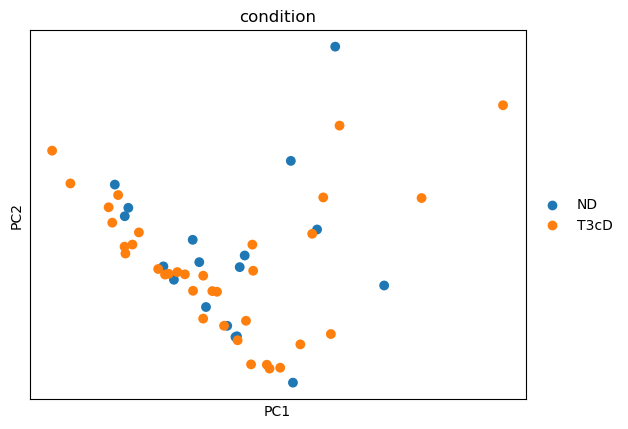

In [15]:
import scanpy as sc

#PCA
sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=200)

### GSEA:

In [16]:
import gseapy as gp
from gseapy.plot import gseaplot


In [17]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
ENSG00000000938,20.314068,1.283865,0.410055,3.130959,0.001742,0.033624,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,18.676032,0.380185,0.355859,1.068356,0.285360,0.636390,NaN
ENSG00000285410,173.379526,0.174970,0.156829,1.115671,0.264563,0.616324,GABPB1-IT1
ENSG00000285417,10.993998,0.484542,0.371533,1.304167,0.192177,0.530044,NaN
ENSG00000285437,16.731025,0.029717,0.287128,0.103498,0.917568,0.972184,POLR2J3


In [18]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
ENSG00000211896,IGHG1,7.165833
ENSG00000148773,MKI67,7.111167
ENSG00000211592,IGKC,6.792592
ENSG00000204262,COL5A2,6.616017
ENSG00000211666,IGLV2-14,6.592529
...,...,...
ENSG00000115484,CCT4,-4.772710
ENSG00000170633,RNF34,-4.891646
ENSG00000172575,RASGRP1,-4.967300
ENSG00000145907,G3BP1,-5.203191


In [19]:
ranking=ranking.drop_duplicates('Symbol') #elimina els symbols duplicats
ranking

,Symbol,stat
ENSG00000211896,IGHG1,7.165833
ENSG00000148773,MKI67,7.111167
ENSG00000211592,IGKC,6.792592
ENSG00000204262,COL5A2,6.616017
ENSG00000211666,IGLV2-14,6.592529
...,...,...
ENSG00000115484,CCT4,-4.772710
ENSG00000170633,RNF34,-4.891646
ENSG00000172575,RASGRP1,-4.967300
ENSG00000145907,G3BP1,-5.203191


In [20]:
manual_set = {'things':['IGHG1','MKI67','IGKC','COL5A2','IGLV2-14']}
manual_set

{'things': ['IGHG1', 'MKI67', 'IGKC', 'COL5A2', 'IGLV2-14']}

In [21]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [22]:
import gseapy as gp

# Realiza el análisis de enriquecimiento de genes
#pre_res = gp.prerank(rnk=ranking.reset_index(drop=True),
#                     gene_sets=['GO_Biological_Process_2023', manual_set],
 #                    seed=6, permutation_num=100)


In [77]:
pre_res = gp.prerank(rnk=ranking.reset_index(drop=True),
                     gene_sets=['Reactome_2022', manual_set],
                     seed=6, permutation_num=100)


In [78]:
out=[]

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])
out_df=pd.DataFrame(out, columns=['Term','fdr','es','nes']).sort_values('fdr').reset_index(drop=True)
out_df

#fdr= p_value corrected
#es=enrichment score
#nes= normalized enrichment score

,Term,fdr,es,nes
0,Reactome_2022__Immunoregulatory Interactions B...,0.000000,0.722721,2.558019
1,Reactome_2022__Integrin Cell Surface Interacti...,0.000000,0.738003,2.480427
2,Reactome_2022__Translation R-HSA-72766,0.000000,-0.513782,-2.923441
3,Reactome_2022__GPCR Ligand Binding R-HSA-500792,0.000000,0.502942,2.144995
4,Reactome_2022__Platelet Degranulation R-HSA-11...,0.000000,0.542808,2.237512
...,...,...,...,...
1067,Reactome_2022__Sialic Acid Metabolism R-HSA-40...,0.996483,0.186224,0.545397
1068,Reactome_2022__Cholesterol Biosynthesis R-HSA-...,0.996691,0.167649,0.485488
1069,Reactome_2022__Synaptic Adhesion-Like Molecule...,0.996736,0.209943,0.561192
1070,Reactome_2022__CREB1 Phosphorylation Thru NMDA...,0.997083,0.195840,0.551555


In [80]:
print(out_df.head(20))

                                                 Term  fdr        es       nes
0   Reactome_2022__Immunoregulatory Interactions B...  0.0  0.722721  2.558019
1   Reactome_2022__Integrin Cell Surface Interacti...  0.0  0.738003  2.480427
2              Reactome_2022__Translation R-HSA-72766  0.0 -0.513782 -2.923441
3     Reactome_2022__GPCR Ligand Binding R-HSA-500792  0.0  0.502942  2.144995
4   Reactome_2022__Platelet Degranulation R-HSA-11...  0.0  0.542808  2.237512
5   Reactome_2022__Generation Of Second Messenger ...  0.0  0.818339  2.539618
6   Reactome_2022__Gap-filling DNA Repair Synthesi...  0.0 -0.486113 -2.188212
7      Reactome_2022__RHOB GTPase Cycle R-HSA-9013026  0.0  0.610125  2.238154
8     Reactome_2022__Collagen Formation R-HSA-1474290  0.0  0.752041  2.671815
9            Reactome_2022__Neddylation R-HSA-8951664  0.0 -0.396439 -2.189531
10  Reactome_2022__Interleukin-2 Family Signaling ...  0.0  0.650584  2.215630
11  Reactome_2022__Cargo Trafficking To Periciliar..

In [82]:
nes=out_df.sort_values('nes')
print(nes.head(20))

                                                 Term  fdr        es       nes
2              Reactome_2022__Translation R-HSA-72766  0.0 -0.513782 -2.923441
69  Reactome_2022__Mitochondrial Translation Termi...  0.0 -0.571770 -2.644770
20  Reactome_2022__Mitochondrial Translation Elong...  0.0 -0.576725 -2.632270
34  Reactome_2022__Mitochondrial Translation Initi...  0.0 -0.571368 -2.605356
52  Reactome_2022__Mitochondrial Translation R-HSA...  0.0 -0.568645 -2.592789
54         Reactome_2022__rRNA Processing R-HSA-72312  0.0 -0.455487 -2.585428
53    Reactome_2022__tRNA Aminoacylation R-HSA-379724  0.0 -0.647333 -2.558412
18  Reactome_2022__rRNA Processing In Nucleus And ...  0.0 -0.457235 -2.554128
63  Reactome_2022__Cytosolic tRNA Aminoacylation R...  0.0 -0.698031 -2.541433
75  Reactome_2022__Respiratory Electron Transport,...  0.0 -0.540115 -2.535939
14  Reactome_2022__HSP90 Chaperone Cycle For Stero...  0.0 -0.586109 -2.527934
45  Reactome_2022__Processing Of Capped Intron-Con..

### ClusterMap:

In [26]:
import numpy as np
import seaborn as sns

dds.layers['normed_counts']

array([[2.04358515e+02, 0.00000000e+00, 7.57648325e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.17402676e+00],
       [2.49917706e+02, 0.00000000e+00, 7.51015329e+02, ...,
        6.31105319e+00, 0.00000000e+00, 0.00000000e+00],
       [4.27797770e+02, 0.00000000e+00, 6.27353581e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.30186095e+02, 5.99564243e+00, 8.05129127e+02, ...,
        3.42608139e+00, 0.00000000e+00, 2.56956104e+00],
       [3.15758986e+02, 0.00000000e+00, 8.71704308e+02, ...,
        7.48244041e-01, 0.00000000e+00, 1.49648808e+00],
       [3.11756175e+02, 0.00000000e+00, 8.02091130e+02, ...,
        0.00000000e+00, 0.00000000e+00, 6.05351796e+00]])

In [27]:
dds.layers['log1p']=np.log1p(dds.layers['normed_counts'])
dds

AnnData object with n_obs × n_vars = 53 × 48221
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [28]:
dds_sigs=dds[:, sigs.index]
dds_sigs.obs

,condition
Sample,
ND_counts,ND
ND_counts.1,ND
ND_counts.2,ND
ND_counts.3,ND
ND_counts.4,ND
ND_counts.5,ND
ND_counts.6,ND
ND_counts.7,ND
ND_counts.8,ND


In [29]:
grapher=pd.DataFrame(dds_sigs.layers['log1p'].T,
                    index=dds_sigs.var_names, columns=dds_sigs.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T3cD_counts.25,T3cD_counts.26,T3cD_counts.27,T3cD_counts.28,T3cD_counts.29,T3cD_counts.30,T3cD_counts.31,T3cD_counts.32,T3cD_counts.33,T3cD_counts.34
ENSG00000000460,4.870258,4.684793,3.546020,4.592718,4.289735,3.427177,4.568465,4.623949,4.397519,4.626575,...,3.854138,3.170321,3.635944,3.088107,4.385560,4.372697,3.390411,3.070677,3.809911,3.900520
ENSG00000000938,3.023651,0.816342,3.509388,2.168318,0.000000,1.482633,2.155440,0.673409,1.536369,1.938856,...,2.969140,1.547510,2.927906,3.876887,3.092601,2.961684,3.558308,3.109642,5.039482,2.513684
ENSG00000000971,3.481959,5.035181,6.379596,3.146854,4.200068,5.224108,5.441178,1.356539,2.115698,3.083183,...,5.986995,6.166296,7.260044,6.564462,7.057840,7.457336,6.094864,6.830920,6.629990,6.826427
ENSG00000002726,2.152819,2.406737,2.138105,0.000000,3.131004,0.000000,2.390705,2.795729,3.278419,1.380125,...,2.830611,2.128173,3.811564,3.024554,2.635063,4.025200,3.336765,4.823011,4.540976,2.232547
ENSG00000002933,6.216658,6.378749,5.658137,6.559140,6.540046,6.214134,6.587564,7.537269,6.293156,6.899529,...,6.335927,7.106662,7.371061,7.012031,7.026725,7.148463,6.972364,7.676012,6.992966,6.742569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000280119,5.145522,4.913071,4.260488,4.659073,3.932810,4.031113,3.939037,4.660976,4.303439,4.535148,...,5.343604,4.690517,5.053403,5.215027,4.998834,4.086255,4.373031,4.713945,5.746260,5.011088
ENSG00000280229,3.636492,3.965576,3.581357,2.913601,3.901693,2.981881,3.778204,3.968199,3.801588,4.240379,...,4.132025,3.292062,4.182215,4.347866,4.095309,4.121175,4.039644,2.343892,4.500266,3.697539
ENSG00000280379,1.449513,3.692088,2.275272,3.551859,2.603619,2.252482,2.834773,3.097387,3.521323,3.324265,...,4.432461,4.147556,3.910088,3.356510,3.016333,2.924530,3.087732,3.183292,4.031938,3.959954
ENSG00000282608,0.000000,1.799867,3.471364,0.000000,0.000000,3.212120,2.920625,3.257468,0.000000,2.557350,...,3.780291,2.385639,3.740039,3.204244,3.055194,4.407660,3.219981,2.060789,4.120788,1.840046


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


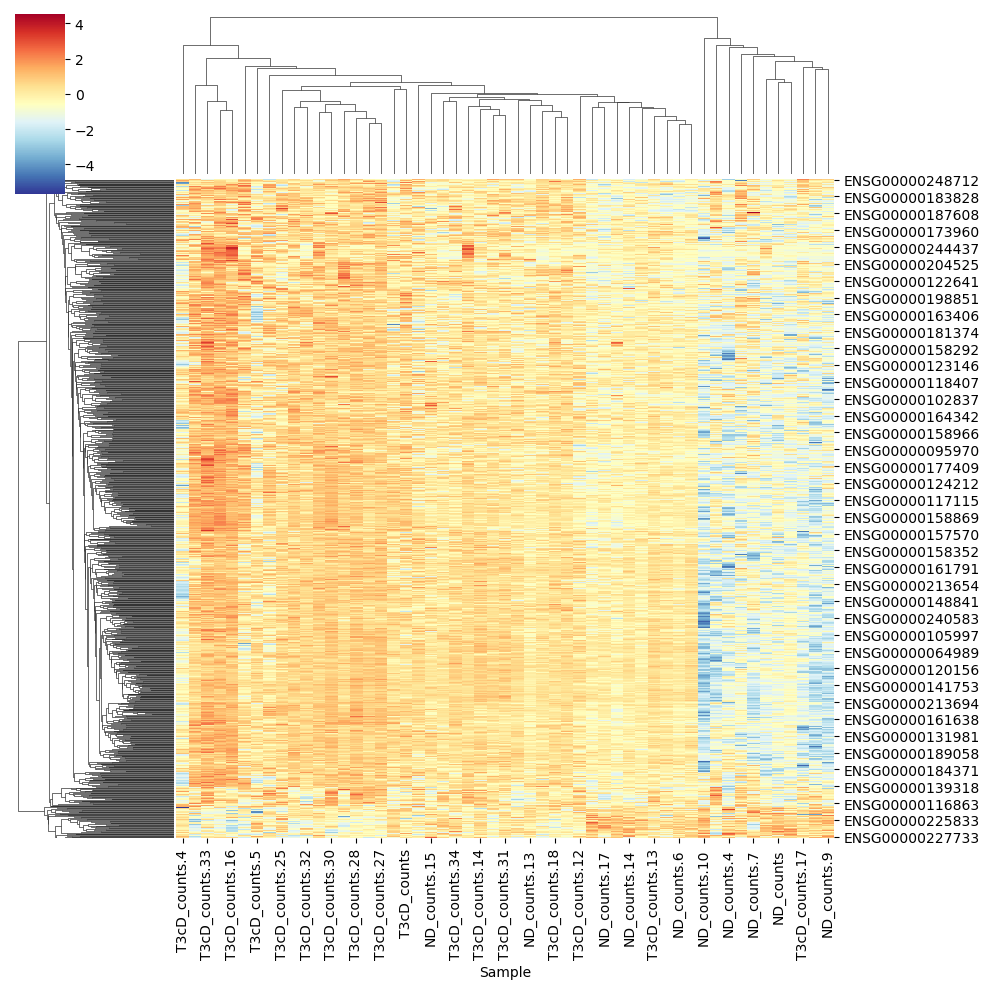

In [30]:
sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')

C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

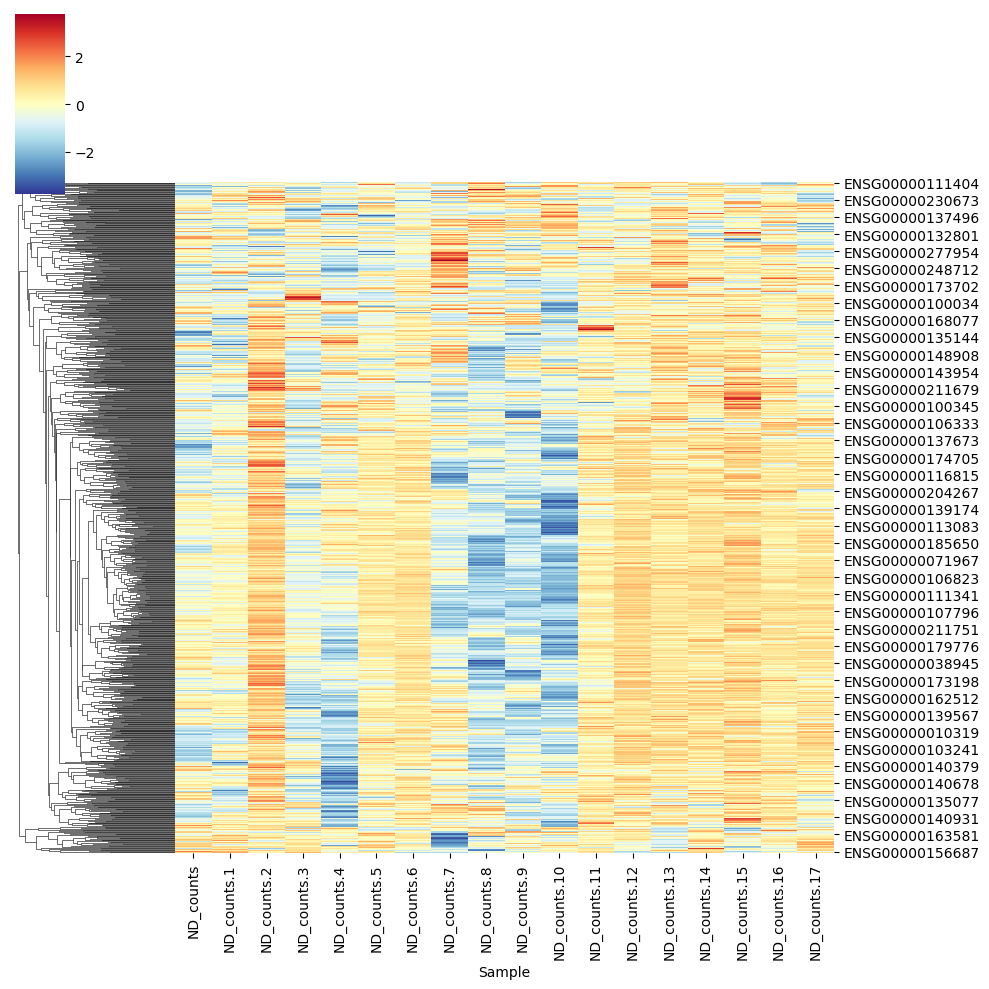

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples = [col for col in grapher.columns if "ND" in col]
t2d_samples = [col for col in grapher.columns if "T2D" in col]

ordered_columns = nd_samples + t2d_samples

grapher_ordered = grapher[ordered_columns]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered, z_score=0, cmap="RdYlBu_r", col_cluster=False)

plt.show()

### VolcanoPlot:

In [49]:
from sanbomics.plots import volcano

res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,417.376683,0.499057,0.213201,2.340781,0.019243,0.153742,TSPAN6
ENSG00000000419,741.428087,0.000253,0.119866,0.002110,0.998316,0.999436,DPM1
ENSG00000000457,261.221263,-0.179551,0.100580,-1.785161,0.074235,0.330722,SCYL3
ENSG00000000460,55.605341,-0.581161,0.192089,-3.025475,0.002482,0.042817,C1orf112
ENSG00000000938,20.314068,1.283865,0.410055,3.130959,0.001742,0.033624,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,18.676032,0.380185,0.355859,1.068356,0.285360,0.636390,NaN
ENSG00000285410,173.379526,0.174970,0.156829,1.115671,0.264563,0.616324,GABPB1-IT1
ENSG00000285417,10.993998,0.484542,0.371533,1.304167,0.192177,0.530044,NaN
ENSG00000285437,16.731025,0.029717,0.287128,0.103498,0.917568,0.972184,POLR2J3


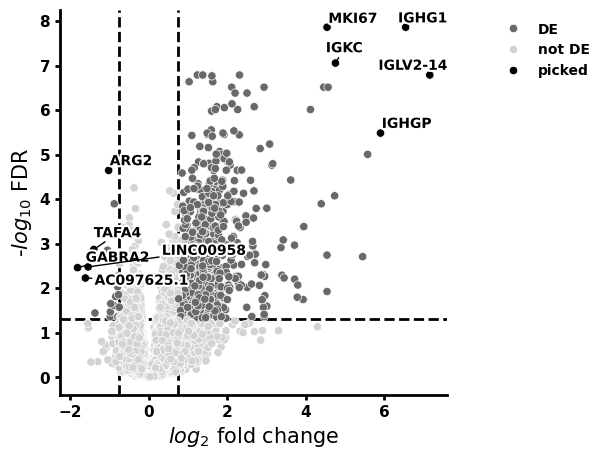

In [50]:
volcano(res, symbol='Symbol')

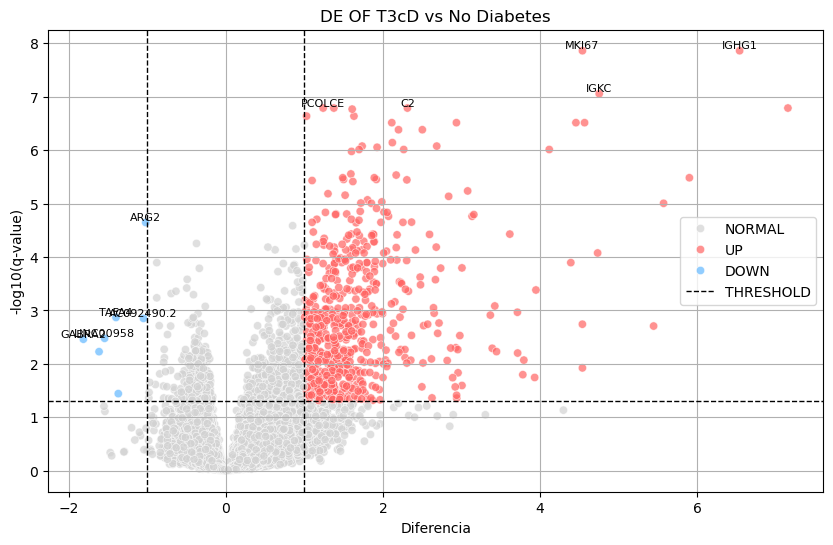

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Datos
t_results = pd.DataFrame({
    'gen': res['Symbol'],
    'p_value': res['pvalue'],
    'q_value': res['padj'],
    'LogFC': res['log2FoldChange']
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['LogFC'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['LogFC'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_sign = t_results[t_results['sign'] != 'NORMAL']

# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
colors = {"NORMAL": "#D2D2D2", "UP": "#FF6462", "DOWN": "#62B8FF"}

sns.scatterplot(x=t_results['LogFC'], y=-np.log10(t_results['q_value']), hue=t_results['sign'], palette=colors, alpha=0.7)
plt.axhline(-np.log10(0.05), color='k', linestyle='--', linewidth=1, label='THRESHOLD')
plt.axvline(1, color='k', linestyle='--', linewidth=1)
plt.axvline(-1, color='k', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T3cD vs No Diabetes')
plt.legend()
plt.grid(True)

# Filtrar los genes UP más significativos
up_genes = t_results[t_results['sign'] == 'UP'].nsmallest(5, 'q_value')

for idx, row in up_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

# Filtrar los genes DOWN más significativos
down_genes = t_results[t_results['sign'] == 'DOWN'].nsmallest(5, 'q_value')

for idx, row in down_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

plt.show()


In [73]:
print("Genes diferencialmente expresados con su q-value y dirección:")
de=t_sign[['gen', 'q_value', 'sign']]
de=de.sort_values(by='q_value', ascending=False)
de

Genes diferencialmente expresados con su q-value y dirección:


,gen,q_value,sign
ENSG00000104267,CA2,4.960574e-02,UP
ENSG00000114251,WNT5A,4.912885e-02,UP
ENSG00000229989,MIR181A1HG,4.847124e-02,UP
ENSG00000127533,F2RL3,4.846448e-02,UP
ENSG00000136689,IL1RN,4.803738e-02,UP
...,...,...,...
ENSG00000106333,PCOLCE,1.625936e-07,UP
ENSG00000204262,COL5A2,1.625936e-07,UP
ENSG00000211592,IGKC,8.769822e-08,UP
ENSG00000148773,MKI67,1.374346e-08,UP
